# Spearman Heatmap
- Spearman Correlation
- Heatmap Visualization

> **Note:**  
> Use the DATASET TEMPLATES below to run the codes


In [23]:
# DATA_FILE = "raw_data/PSEN1_Sun.csv"
# OUTCOME_COLUMNS = ["AAO", "Total Activity", "Amount of Ab42", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Sun et al."
# OUTPUT_PREFIX = "PSEN1_Sun"

In [24]:
# DATA_FILE = "raw_data/PSEN1_Petit.csv"
# OUTCOME_COLUMNS = ["Aβ37 [%]", "Aβ38 [%]", "Aβ40 [%]", "Aβ42 [%]", "Aβ43 [%]"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Petit et al."
# OUTPUT_PREFIX = "PSEN1_Petit"

In [25]:
# DATA_FILE = "raw_data/PSEN1_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Pillai et al."
# OUTPUT_PREFIX = "PSEN1_Pillai"

In [26]:
# DATA_FILE = "raw_data/PSEN2_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN2 Pillai et al."
# OUTPUT_PREFIX = "PSEN2_Pillai"

In [27]:
# DATA_FILE = "raw_data/APP_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — APP Pillai et al."
# OUTPUT_PREFIX = "APP_Pillai"

In [28]:
# --- 1️⃣ Import Libraries ---
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

### Change the cell below to read the dataset you want

In [29]:
# --- 2️⃣ User Inputs (EDIT THESE ONLY) ---
DATA_FILE = "../raw_data/APP_Pillai.csv"
OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
HEATMAP_TITLE = "Spearman's Correlation Heatmap — APP Pillai et al."
OUTPUT_PREFIX = "APP_Pillai"

In [30]:
# --- 3️⃣ Load Dataset ---
df = pd.read_csv(DATA_FILE)
df  # display dataframe

,Variants,Mutation,Aβ40 (relative to WT),Significant?,Aβ42 (relative to WT),Significant?.1,Aβ42/40,Significant?.2,variant_id_hg38,variant_id_hg19,...,DANN_rankscore,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-phred_coding,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-PC-phred_coding
0,APP:p.Ala201Val,A201V,0.910310,No,0.90097,No,0.989730,No,21-26051060-G-A,21-27423376-G-A,...,0.84966,0.275496,0.38844,N,-0.368639,0.26318,1.452508,-0.242586,0.29714,1.687206
1,APP:p.Ala235Val,A235V,0.493400,Yes,0.58420,Yes,1.185700,No,21-26022001-G-A,21-27394317-G-A,...,0.45334,0.260399,0.37653,N,-0.372562,0.26176,1.443685,-0.237169,0.29902,1.699391
2,APP:p.Asp243Asn,D243N,0.995382,No,0.98841,No,0.992705,No,21-26021978-C-T,21-27394294-C-T,...,0.55369,0.132717,0.24999,N,-0.329888,0.27742,1.541930,-0.332699,0.26733,1.498262
3,APP:p.Glu246Lys,E246K,1.174600,No,1.24830,No,0.937060,No,21-26021969-C-T,21-27394285-C-T,...,0.33426,0.468507,0.51360,N,0.016920,0.42365,2.571805,0.095528,0.44048,2.716294
4,APP:p.Arg468His,R468H,0.864000,No,0.89070,No,1.029830,No,21-25975125-C-T,21-27347438-C-T,...,0.99975,0.949486,0.96204,D,0.749112,0.82755,7.864946,0.707836,0.82882,7.901620
5,APP:p.Ala479Ser,A479S,0.889300,No,0.86070,No,0.972680,No,21-25975093-C-A,21-27347406-C-A,...,0.81539,0.527271,0.54770,D,0.181945,0.50091,3.224247,0.226988,0.51100,3.318319
6,APP:p.Lys496Gln,K496Q,1.291300,Yes,1.15400,No,0.887300,No,21-25955728-T-G,21-27328042-T-G,...,0.60447,0.799741,0.72492,D,0.510926,0.67566,5.121424,0.524158,0.69454,5.386425
7,APP:p.Ala500Thr,A500T,1.001174,No,1.06989,No,1.068250,No,21-25955716-C-T,21-27328030-C-T,...,0.99735,0.924799,0.90303,D,0.505744,0.67258,5.080414,0.487211,0.66963,5.044526
8,APP:p.Lys510Asn,K510N,1.086800,No,1.12300,No,0.965560,No,21-25955684-C-A,21-27327998-C-A,...,0.78004,0.591810,0.58630,D,0.202641,0.51089,3.314827,0.158886,0.47349,2.989065
9,APP:p.Tyr538His,Y538H,0.436700,Yes,0.45210,Yes,1.088460,No,21-25954665-A-G,21-27326979-A-G,...,0.79560,0.572879,0.57479,D,0.327222,0.57335,3.922725,0.426607,0.63031,4.552488


In [31]:
# --- 4️⃣ Helper Functions ---
def coerce_numeric(s: pd.Series) -> pd.Series:
    """Convert a Series to numeric, removing symbols like '%' and ','."""
    if s.dtype.kind in "biufc":
        return s.astype(float)
    cleaned = (
        s.astype(str)
         .str.replace(r'[%\s]', '', regex=True)
         .str.replace(',', '', regex=False)
         .replace({'nan': np.nan, 'None': np.nan})
    )
    return pd.to_numeric(cleaned, errors="coerce")

def pairwise_corr(x, y, method="spearman"):
    """Compute correlation safely; require n ≥ 3."""
    x_num, y_num = coerce_numeric(x), coerce_numeric(y)
    mask = np.isfinite(x_num.values) & np.isfinite(y_num.values)
    n = int(mask.sum())
    if n < 3:
        return np.nan, np.nan, n
    if method == "spearman":
        r, p = stats.spearmanr(x_num[mask], y_num[mask])
    else:
        r, p = stats.pearsonr(x_num[mask], y_num[mask])
    return float(r), float(p), n

In [32]:
# --- 5️⃣ Identify Predictors/Outcomes ---
predictors = [c for c in df.columns if c.endswith("_rankscore")]
outcomes = [c for c in OUTCOME_COLUMNS if c in df.columns]

if not predictors:
    raise ValueError("No predictor columns ending with '_rankscore' found.")
if not outcomes:
    raise ValueError("None of the specified outcome columns were found in the dataset.")

print(f"Using {len(predictors)} predictors and {len(outcomes)} outcomes.\n")

Using 37 predictors and 3 outcomes.



In [33]:
# --- 6️⃣ Compute Correlations ---
rows = []
for pred in predictors:
    for out in outcomes:
        rho, pval, n = pairwise_corr(df[pred], df[out])
        rows.append({"Predictor": pred, "Outcome": out, "rho": rho, "p_value": pval, "n": n})

corr_df = pd.DataFrame(rows)

In [34]:
# --- 7️⃣ Preserve Order ---
pred_order = CategoricalDtype(categories=predictors, ordered=True)
out_order = CategoricalDtype(categories=outcomes, ordered=True)

corr_df["Predictor"] = corr_df["Predictor"].astype(pred_order)
corr_df["Outcome"] = corr_df["Outcome"].astype(out_order)
corr_df = corr_df.sort_values(["Outcome", "Predictor"]).reset_index(drop=True)

In [35]:
# --- 8️⃣ Save Results ---
output_csv = f"../processed_data/{OUTPUT_PREFIX}_correlations.csv"
corr_df.to_csv(output_csv, index=False)
print(f"Saved correlation table → {output_csv}")

Saved correlation table → ../processed_data/APP_Pillai_correlations.csv


In [36]:
# --- 9️⃣ Prepare Heatmap Matrix ---
rho_matrix = corr_df.pivot(index="Predictor", columns="Outcome", values="rho")

# Optionally reorder rows by mean absolute correlation
rho_matrix = rho_matrix.loc[rho_matrix.abs().mean(axis=1).sort_values(ascending=False).index]

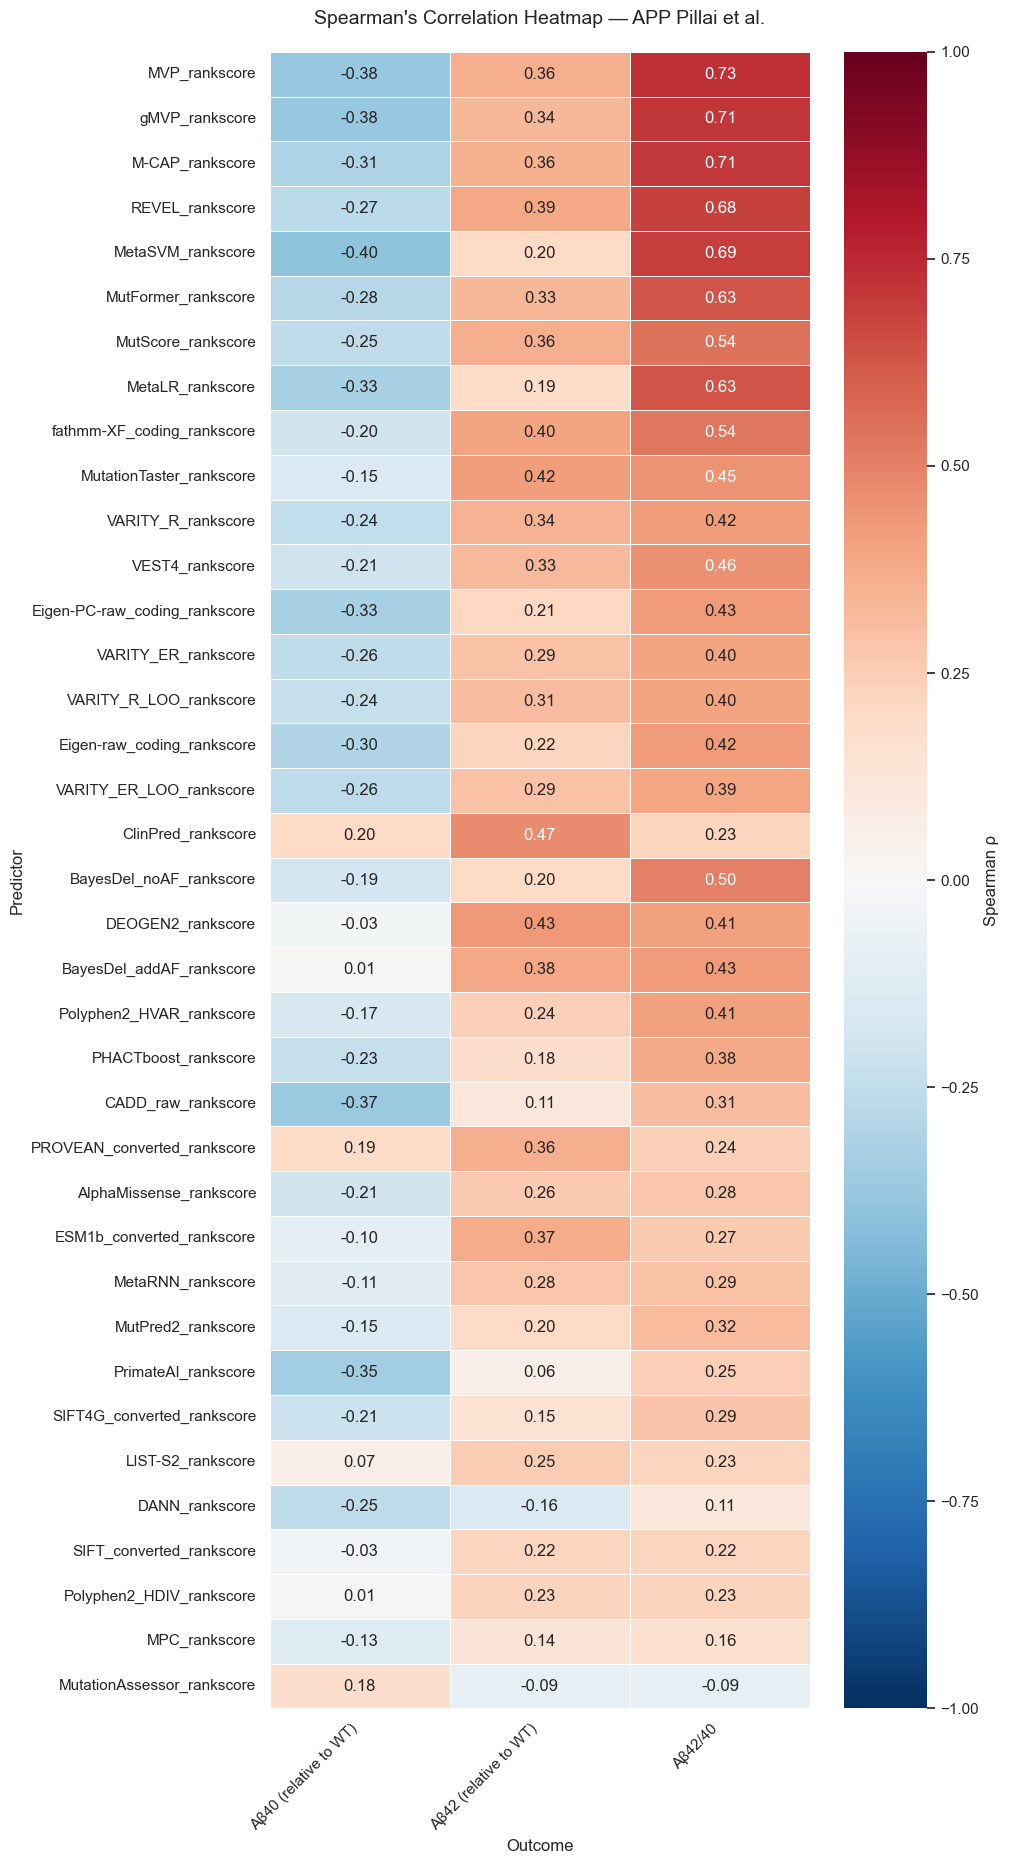

In [37]:
# --- 🔟 Plot Heatmap ---
sns.set(style="white", font_scale=1.0)
fig, ax = plt.subplots(figsize=(10, 0.4 * len(predictors) + 4))

sns.heatmap(
    rho_matrix,
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman ρ"},
    ax=ax
)

ax.set_title(HEATMAP_TITLE, fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

In [38]:
# --- 1️⃣1️⃣ Save Heatmap ---
output_fig = f"../figures/{OUTPUT_PREFIX}_heatmap.png"
fig.savefig(output_fig, dpi=600, bbox_inches="tight", facecolor="white")
print(f"Saved heatmap → {output_fig}")

Saved heatmap → ../figures/APP_Pillai_heatmap.png


In [39]:
# --- 1️⃣1️⃣ Significance Summary (p < 0.05) ---

ALPHA = 0.05

# Filter significant correlations
sig_df = corr_df[corr_df["p_value"] < ALPHA].copy()

# Add direction of effect (sign of rho)
sig_df["Direction"] = np.where(sig_df["rho"] > 0, "Positive", "Negative")

# Select and rename columns for clarity
summary_table = sig_df[
    ["Predictor", "Outcome", "p_value", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Count predictors with at least one significant outcome
n_sig_predictors = summary_table["Predictor"].nunique()
n_total_predictors = corr_df["Predictor"].nunique()

# Display results
print(f"Significant predictors (p < {ALPHA}): "
      f"{n_sig_predictors} / {n_total_predictors}")

summary_table


Significant predictors (p < 0.05): 21 / 37


,Predictor,Outcome,p_value,Direction
77,Polyphen2_HVAR_rankscore,Aβ42/40,0.042457,Positive
41,MutationTaster_rankscore,Aβ42 (relative to WT),0.036896,Positive
78,MutationTaster_rankscore,Aβ42/40,0.024834,Positive
81,VEST4_rankscore,Aβ42/40,0.020659,Positive
8,MetaSVM_rankscore,Aβ40 (relative to WT),0.044786,Negative
82,MetaSVM_rankscore,Aβ42/40,0.000133,Positive
83,MetaLR_rankscore,Aβ42/40,0.000712,Positive
85,M-CAP_rankscore,Aβ42/40,0.000112,Positive
86,REVEL_rankscore,Aβ42/40,0.000169,Positive
88,MVP_rankscore,Aβ42/40,0.000036,Positive


In [40]:
# --- 1️⃣2️⃣ Significant Negative Associations ---

ALPHA = 0.05

# Filter: significant p-value AND negative rho
sig_neg_df = corr_df[
    (corr_df["p_value"] < ALPHA) &
    (corr_df["rho"] < 0)
].copy()

# Add direction label (explicit)
sig_neg_df["Direction"] = "Negative"

# Select and sort relevant columns
negative_summary_table = sig_neg_df[
    ["Predictor", "Outcome", "p_value", "rho", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Counts
n_neg_pairs = len(negative_summary_table)
n_neg_predictors = negative_summary_table["Predictor"].nunique()

negative_summary_table


,Predictor,Outcome,p_value,rho,Direction
8,MetaSVM_rankscore,Aβ40 (relative to WT),0.044786,-0.404693,Negative


In [41]:
# Total number of correlation tests performed
n_total_tests = len(corr_df)

print(f"Total correlation tests performed: {n_total_tests}")
print(f"Significant negative correlations (p < {ALPHA}): {n_neg_pairs}")
print(
    f"Proportion of tests with significant negative correlation: "
    f"{n_neg_pairs} / {n_total_tests} "
    f"({n_neg_pairs / n_total_tests:.1%})"
)


Total correlation tests performed: 111
Significant negative correlations (p < 0.05): 1
Proportion of tests with significant negative correlation: 1 / 111 (0.9%)


In [42]:
# --- 1️⃣3️⃣ Significant Positive Associations ---

ALPHA = 0.05

# Filter: significant p-value AND positive rho
sig_pos_df = corr_df[
    (corr_df["p_value"] < ALPHA) &
    (corr_df["rho"] > 0)
].copy()

# Add direction label
sig_pos_df["Direction"] = "Positive"

# Select and sort relevant columns
positive_summary_table = sig_pos_df[
    ["Predictor", "Outcome", "p_value", "rho", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Counts
n_pos_pairs = len(positive_summary_table)
n_pos_predictors = positive_summary_table["Predictor"].nunique()
n_total_tests = len(corr_df)

positive_summary_table


,Predictor,Outcome,p_value,rho,Direction
77,Polyphen2_HVAR_rankscore,Aβ42/40,0.042457,0.408804,Positive
41,MutationTaster_rankscore,Aβ42 (relative to WT),0.036896,0.419389,Positive
78,MutationTaster_rankscore,Aβ42/40,0.024834,0.447667,Positive
81,VEST4_rankscore,Aβ42/40,0.020659,0.460088,Positive
82,MetaSVM_rankscore,Aβ42/40,0.000133,0.690650,Positive
83,MetaLR_rankscore,Aβ42/40,0.000712,0.631397,Positive
85,M-CAP_rankscore,Aβ42/40,0.000112,0.707110,Positive
86,REVEL_rankscore,Aβ42/40,0.000169,0.682763,Positive
88,MVP_rankscore,Aβ42/40,0.000036,0.728986,Positive
89,gMVP_rankscore,Aβ42/40,0.000063,0.713214,Positive


In [43]:
# Display results
print(f"Total correlation tests performed: {n_total_tests}")
print(f"Significant positive correlations (p < {ALPHA}): {n_pos_pairs}")
print(f"Predictors with ≥1 significant positive outcome: {n_pos_predictors}")
print(
    f"Proportion of tests with significant positive correlation: "
    f"{n_pos_pairs} / {n_total_tests} "
    f"({n_pos_pairs / n_total_tests:.1%})"
)

Total correlation tests performed: 111
Significant positive correlations (p < 0.05): 24
Predictors with ≥1 significant positive outcome: 21
Proportion of tests with significant positive correlation: 24 / 111 (21.6%)
